# Models built for data prediction

In [37]:
from _Setup import *

In [38]:
# Import Data
train = pd.read_csv(missForestTrainFile)
test = pd.read_csv(missForestTestFile)

In [39]:
X_train = train.drop(["SepsisLabel", "Unit2", "HospAdmTime", "Unnamed: 0"], axis = 1)
y_train = train['SepsisLabel']

In [40]:
test = test.drop(["Unit2", "HospAdmTime", "Unnamed: 0"], axis = 1)


In [41]:
test.head()

,time,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,BaseExcess,FiO2,...,Age,ICULOS,Shock,patient,Gender,Unit1,Fever,TCP,TCA,LEU
0,-0.792427,1.351967,0.277806,0.958638,0.042737,-0.253824,-0.367124,-0.553534,0.029974,0.002541,...,1.194123,-0.782578,-0.000848,6560,1.0,1.0,0,0,1,0
1,-0.767598,0.961676,-0.351134,0.958638,-0.942583,-0.766278,-0.618962,-0.553534,0.023291,0.001528,...,1.194123,-0.757751,-0.000848,6560,1.0,1.0,0,0,1,0
2,-0.742770,1.073188,-0.351134,0.958638,0.085577,-0.397163,-0.495095,-0.553534,0.023291,0.000341,...,1.194123,-0.732923,-0.000848,6560,1.0,1.0,0,0,1,0
3,-0.717941,1.798014,-0.980075,0.958638,1.156578,0.771701,0.492840,-0.553534,0.023291,-0.000921,...,1.194123,-0.708095,-0.000848,6560,1.0,1.0,0,0,1,0
4,-0.693112,0.738653,-0.980075,0.742060,-1.071103,-1.115092,-0.920549,-0.553534,0.023291,-0.001937,...,1.194123,-0.683267,-0.000848,6560,1.0,1.0,0,0,1,0


In [42]:
X_train.head()

,time,HR,O2Sat,Temp,SBP,MAP,DBP,Resp,BaseExcess,FiO2,...,Age,ICULOS,Shock,patient,Gender,Unit1,Fever,TCP,TCA,LEU
0,-0.792427,-0.432220,0.749512,-2.124421,-0.621283,0.146051,0.420292,-1.294263,0.045536,0.073114,...,-0.299413,-0.807406,-0.000848,16426,1.0,0.0,1,0,0,1
1,-0.767598,-0.432220,0.749512,-2.124421,-0.621283,0.146051,0.420292,-1.294263,0.045536,0.073114,...,-0.299413,-0.782578,-0.000848,16426,1.0,0.0,1,0,0,1
2,-0.742770,-0.320708,0.592277,-0.914129,-0.428503,0.299849,0.716228,-1.294263,0.045536,-0.000054,...,-0.299413,-0.757751,-0.000848,16426,1.0,0.0,1,0,0,1
3,-0.717941,-0.376464,0.906747,-0.531932,-0.471343,0.053772,0.346308,-1.294263,-0.768098,-0.000054,...,-0.299413,-0.732923,-0.000848,16426,1.0,0.0,1,0,0,1
4,-0.693112,-0.710999,0.906747,-0.531932,-0.342823,-0.130785,0.050372,-1.479445,-0.768098,-0.014687,...,-0.299413,-0.708095,-0.000849,16426,1.0,0.0,1,0,0,1


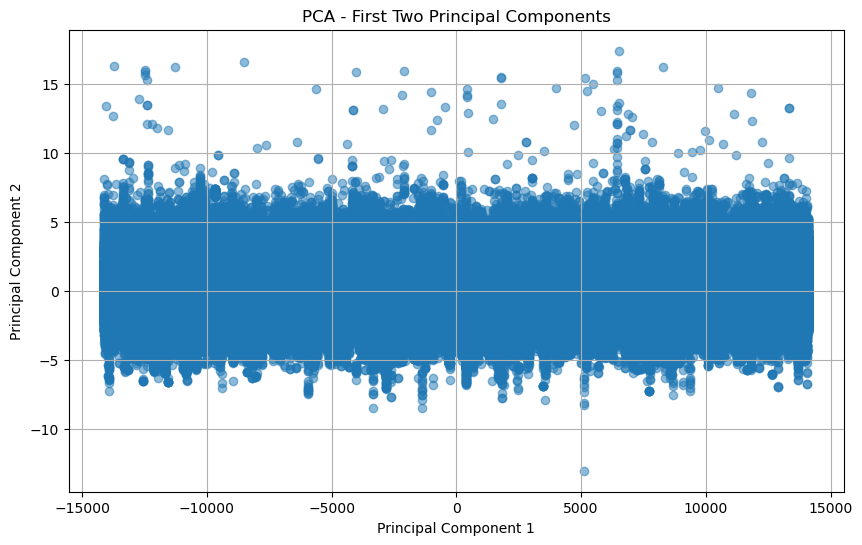

In [43]:
# Transform the data using the first two principal components
pca_2d = PCA(n_components=2)
pca_2d_data = pca_2d.fit_transform(X_train)

# Plot the first two principal components
plt.figure(figsize=(10, 6))
plt.scatter(pca_2d_data[:, 0], pca_2d_data[:, 1], alpha=0.5)
plt.title('PCA - First Two Principal Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.grid()
plt.show()



In [44]:
# Get the PCA components (loadings)
# loadings = pca.components_
# 
# # Create a DataFrame for the loadings
# loadings_df = pd.DataFrame(loadings, columns=X_train.columns)
# 
# # Set pandas options to display floats in a more readable format
# pd.set_option('display.float_format', lambda x: '%.6f' % x)
# 
# # Get the loadings for the first principal component
# first_pc_loadings = loadings_df.iloc[0]
# 
# 
# # Display the loadings for the first principal component separately (optional)
# print("\nLoadings for the First Principal Component:")
# print(first_pc_loadings)

In [45]:
# from linearmodels.panel import PanelOLS
# import statsmodels.api as sm
# 
# # Set the multi-index for your panel data
# df = resampled_train.set_index(['patient', 'time'])
# 
# # Prepare the dependent variable (y) and independent variables (X)
# X = df[['Glucose', 'Fibrinogen', 'Bilirubin_total']]  # Remove 'Age' if it does not vary within entities
# X = sm.add_constant(X)  # Add a constant term
# 
# y = df['SepsisLabel']  # Your binary dependent variable
# 
# # Combine y and X into a single DataFrame for the formula
# df_combined = X.copy()
# df_combined['SepsisLabel'] = y
# 
# # Fit the model using the fixed effects estimator
# model = PanelOLS.from_formula('SepsisLabel ~ Glucose + Fibrinogen + Bilirubin_total + EntityEffects', data=df_combined)
# 
# # Get the results without drop_absorbed
# results = model.fit()
# 
# # Display the results
# print(results)



In [46]:
X_train_ydf = train.drop(["Unit2", "HospAdmTime", "Unnamed: 0"], axis = 1)
X_train_ydf['SepsisLabel'] = X_train_ydf['SepsisLabel'].astype(int)
ydf_model = ydf.GradientBoostedTreesLearner(label='SepsisLabel').train(X_train_ydf, verbose = 2)

Train model on 1389147 examples
Model trained in 0:03:04.116050


In [47]:
ydf_model.describe()

In [48]:
model_evaluated = ydf_model.evaluate(X_train_ydf)

In [49]:
model_evaluated

Label \ Pred,0,1
0,1.06545e+06,38830
1,3125,281742


In [50]:
mat = model_evaluated.confusion_matrix
vals = mat.matrix

precision = vals[1][1] / (vals[1][1] + vals[1][0])
recall = vals[1][1] / (vals[1][1] + vals[0][1])

f1 = (2*precision*recall)/(precision+recall)
print(precision, recall, f1)

0.8788727649326828 0.9890299683712048 0.9307031757121692


In [51]:
yHatTrain = ydf_model.predict(X_train_ydf)

In [52]:
# Tuning the threshold for classification
from sklearn.metrics import f1_score

for i in np.arange(0.2, 0.8, 0.05):
    yHatTrainScaled = np.where(yHatTrain >= i, 1, 0)
    print(i, " ", f1_score(y_train, yHatTrainScaled))

0.2   0.9099011225931157
0.25   0.92500771871475
0.3   0.9340249422661643
0.35   0.9383947236324588
0.39999999999999997   0.9391406903285369
0.44999999999999996   0.9359958853448065
0.49999999999999994   0.9307031757121692
0.5499999999999999   0.9236519523966126
0.5999999999999999   0.9148837452569313
0.6499999999999999   0.9035113028543528
0.7   0.8905777545731628
0.7499999999999998   0.8737856236096015
0.7999999999999998   0.8518983330618062


In [53]:
# Predict labels
yHatTest = ydf_model.predict(test)

In [54]:
yHatTestScaled = np.where(yHatTest >= 0.4, 1, 0)

In [71]:
test_submission = pd.read_csv(rawSubmissionFile)
test_submission.head()

,ID,SepsisLabel
0,6560_1,0
1,6560_2,0
2,6560_3,0
3,6560_4,0
4,6560_5,0


In [75]:
test_submission['SepsisLabel'] = yHatTestScaled
test_submission.head()

,ID,SepsisLabel
0,6560_1,0
1,6560_2,0
2,6560_3,0
3,6560_4,0
4,6560_5,0


In [76]:
test_submission['IDAppended'] = test_submission['ID'].map(lambda x : str(x).partition("_")[0])

test_submission.head(20)

,ID,SepsisLabel,IDAppended
0,6560_1,0,6560
1,6560_2,0,6560
2,6560_3,0,6560
3,6560_4,0,6560
4,6560_5,0,6560
5,6560_6,0,6560
6,6560_7,0,6560
7,6560_8,0,6560
8,6560_9,0,6560
9,6560_10,0,6560


In [77]:
test_submission['SepsisLabel'] = (
    test_submission.groupby('IDAppended')['SepsisLabel']
    .transform(lambda x: (x.cumsum() > 0).astype(int))
)
test_submission = test_submission.drop("IDAppended", axis = 1)

In [78]:
#!dir
test_submission.to_csv("../Data/rawData/ydf_submission.csv", index = False)